## Unsupervised Machine Learning
- KMeans Clusters
- Hierarchical Clustering
- DBSCAN
- PCA
- ISOMAP
- t-SNE
- Association Rule Learning

## Test Data
- Kaggle

In [1]:
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 96% 63.0M/66.0M [00:00<00:00, 140MB/s]
100% 66.0M/66.0M [00:00<00:00, 140MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


## Imports and Env Setting
- pandas
- numpy
- sklearn
  - preprocessing
    - StandardScaler
- matplotlib
  - pyplot

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## K-Means Clustering
- Distnace based clustering algorithms
- PCA can be used to form better clusters by reduce number of dimensions
- Elbow method can be used to find proper number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


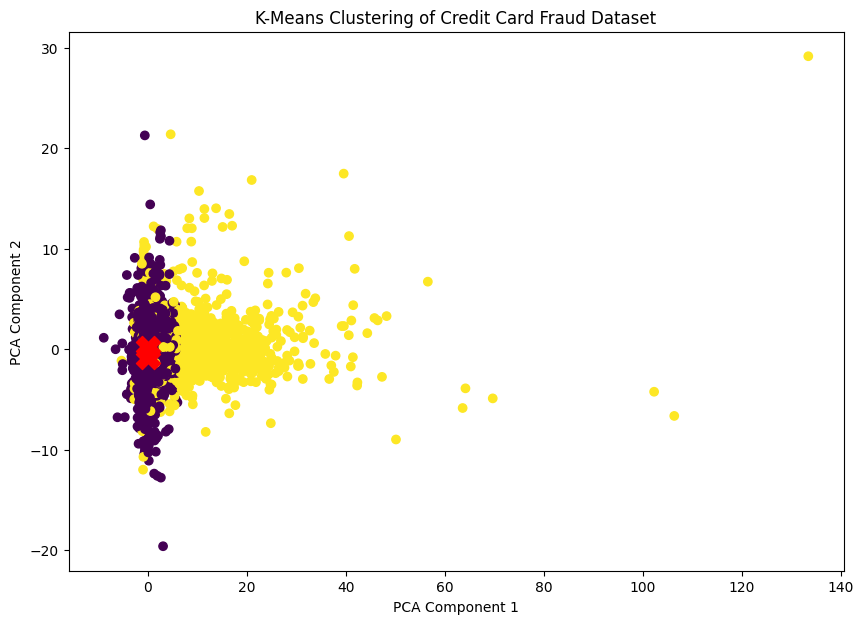

In [3]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Data Set loads and drop unnecessary columns
data = pd.read_csv('/content/creditcard.csv')
X = data.drop(['Time', 'Class'], axis=1)

# Data normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# n_clusters -> number of clusters that I wannt find
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Credit Card Fraud Dataset')
plt.show()

## Hierarchical Clustering


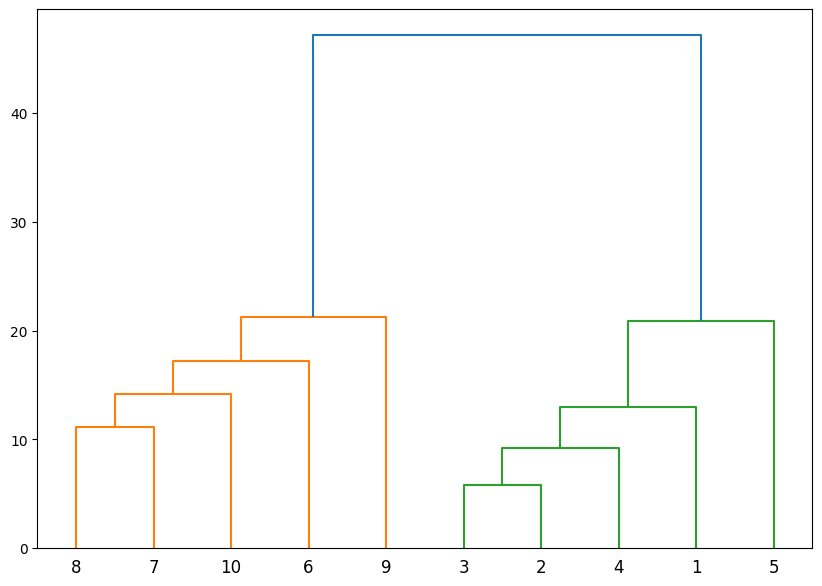

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

labels = range(1, 11)
linked = linkage(X, 'single')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labels,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

## DBSCAN

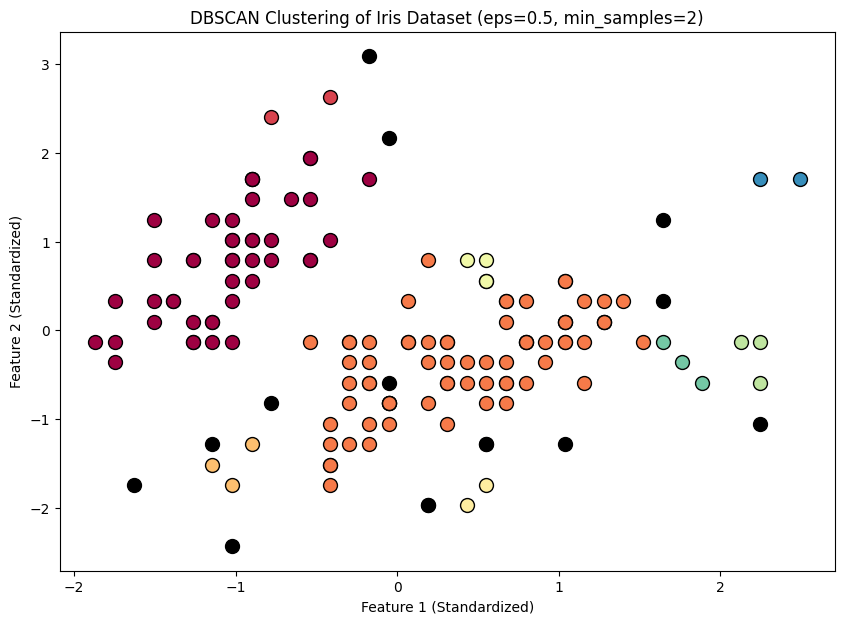

In [5]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=2)
labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(10, 7))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X_scaled[class_member_mask]

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)

plt.title('DBSCAN Clustering of Iris Dataset (eps=0.5, min_samples=2)')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()

## PCA analysis

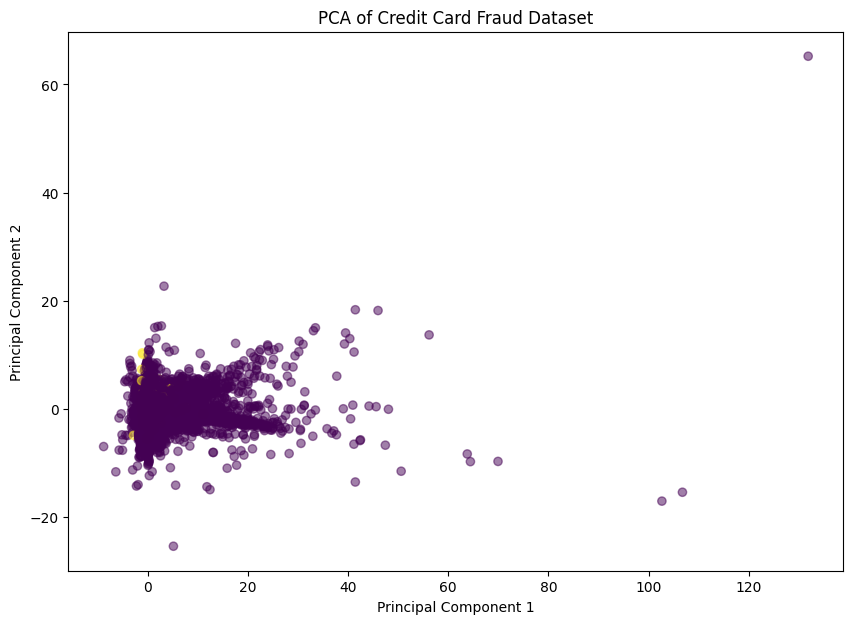

In [6]:
from sklearn.decomposition import PCA

data = pd.read_csv('/content/creditcard.csv')

X = data.drop(['Time', 'Class'], axis=1)
y = data['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Credit Card Fraud Dataset')
plt.show()

## ISOMAP

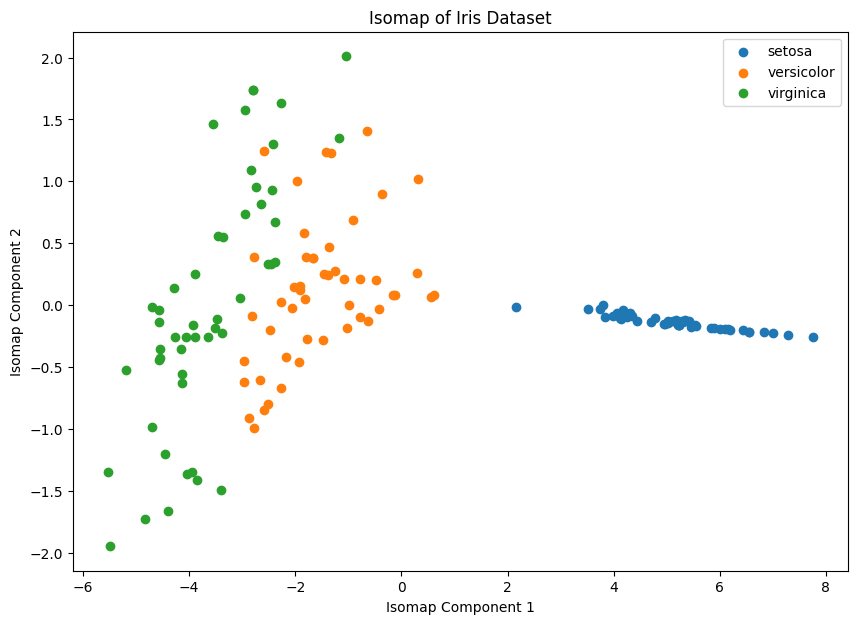

In [7]:
from sklearn.manifold import Isomap
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

isomap = Isomap(n_components=2, n_neighbors=5)
X_isomap = isomap.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
for target in np.unique(y):
    plt.scatter(X_isomap[y == target, 0], X_isomap[y == target, 1], label=iris.target_names[target])
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.title('Isomap of Iris Dataset')
plt.legend()
plt.show()

## t-SNE


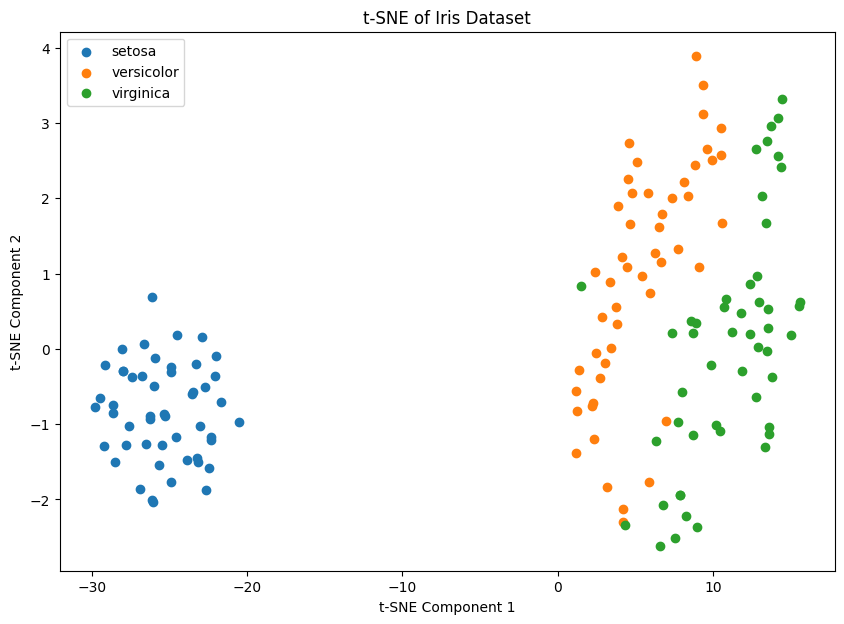

In [15]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
for target in np.unique(y):
    plt.scatter(X_tsne[y == target, 0], X_tsne[y == target, 1], label=iris.target_names[target])

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Iris Dataset')
plt.legend()
plt.show()